In [5]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Implementación de Batch K-Means

In [6]:
# Cargamos el dataset
df = pd.read_csv('../Data/Candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [14]:
# Eliminamos la columna 'competitorname'
X = df.drop('competitorname', axis=1)

# Creamos el modelo
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8)

# Entrenamos el modelo
kmeans.fit(X)

# Obtenemos los centroides
centroids = kmeans.cluster_centers_
print(f'Total de centroides: {len(centroids)}')

# Agregamos la columna 'cluster' al dataset
df['cluster'] = kmeans.predict(X)
df

Total de centroides: 4


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,1
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,3
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,3
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,3


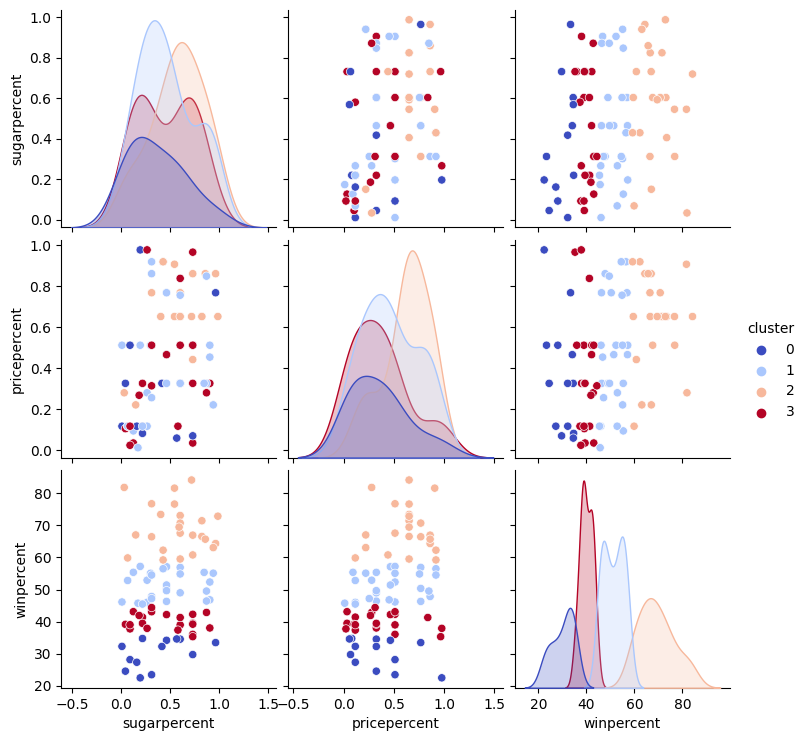

In [19]:
# Creamos un pairplot
sns.pairplot(
    df[['sugarpercent', 'pricepercent', 'winpercent', 'cluster']],
    hue='cluster',
    palette='coolwarm'
);

# Implementación de Mean-Shift

In [20]:
# Cargamos los datos
df = pd.read_csv('../Data/Candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [24]:
from sklearn.cluster import MeanShift
# Eliminamos la columna 'competitorname'
X = df.drop('competitorname', axis=1)

# Creamos el modelo y lo entrenamos
meanshift = MeanShift().fit(X)

# Obtenemos los centroides
centroids = meanshift.cluster_centers_
print(f'Total de centroides: {len(centroids)}')

# Agregamos la columna 'cluster' al dataset
df['cluster'] = meanshift.predict(X)
df

Total de centroides: 3


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


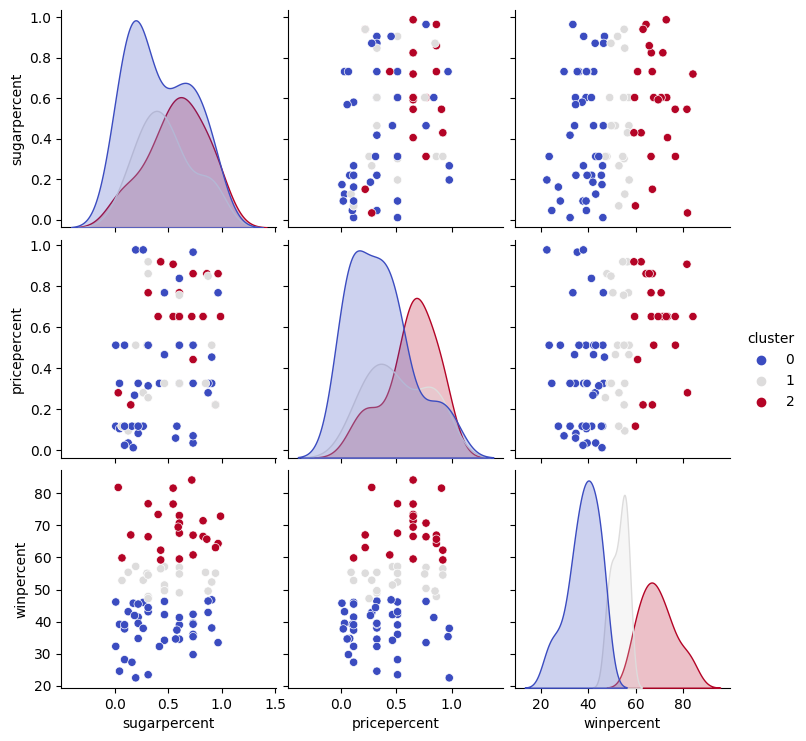

In [25]:
# Creamos un pairplot
sns.pairplot(
    df[['sugarpercent', 'pricepercent', 'winpercent', 'cluster']],
    hue='cluster',
    palette='coolwarm'
);